<a href="https://colab.research.google.com/github/IconOfDreamers99/IIITH-AIML/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

* **'matplotlib.pyplot as plt'** : this imports the 'pyplot' module from the 'matplotlib' library, which is commonly used for creating visualizations like plots and charts
* **'numpy as np'** : this imports 'numpy' library, often abbreviated as 'np'. 'numpy' is used for numerical computations and provides support for arrays and mathematical operations.
* **'from sklearn import datasets'** : this importsa the 'datasets' module from the 'scikit-learn' library(often reffered to as 'sklearn'). Scikit-learn is a popular machine learning library, and the 'datasets' module within it provides access to various sample satasets for practice and experimentation.
* **'np.random.default_rng(seed=42)'** : random number generator (**'default_rng'**) from **'numpy'** is created with a specific seed value of **'42'**. setting a seed ensures that the random numbers generated will be the same every time you run the code. this is useful for reproducibility in data generation or random processes within your code.

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-2-d89ecb46a347>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


1. **'datasets.fetch_california_housing()'** : This line of code using the **'datasets'** module from scikit-learn(sklearn) to fetch a dataset called the "California housing dataset". This dataset is commonly used for regression tasks, and it contains information about housing districts in California.
<br>
2. **'print(dataset.DESCR)'** : this line will print a description of the dataset, including information about its features, source, and usage.
<br>
3. **'print(dataset.keys())'** : This line will print the keys or attributes available in the dataset. These attributes typically include 'data'(the feature matrix) and 'target'(the target values), among others.
<br>
4. This line of code is converting the target values of the dataset from floating-point numbers to integers using Numpy :    
  * **'dataset.target.astype(np.int)'** : It takes the 'target' attribute of the dataset, which usually contains the house prices, and converts it to integer data type using 'astype(np.int)'. This asuggests that you might be interested in training this dataset as a classification problem where you classify districts into categories ratherthan predicting precise house prices.
  <br>
5. These lines print the shapes of the feature matrix (data) and the target array : <br>
  * **'dataset.data.shape'** : This line prints the shape (number of rows and columns) of the feature matrix, which contains data related to housing districts.
  * **'dataset.target.shape'** : This line prints the shape of the target array, which contains the target values(prices or classes).

Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

1. **'NN1' Function** : <br>
  * **'traindata'** : This parameter represents the training data, which is a numpy array containing the feature vectors of the training samples.
  * **'trainlabel'** : This parameter represents the labels corresponding to the tringing data. It is a numpy array of class labels for the training samples.
  * **'query'** : This parameter represents a single query point (a feature vector) for which we want to make a classification prediction.
<br>
  * **'diff'** calculates the element-wise difference between the training data and the query point.
  * **'sq'** squares these differences element-wise.
  * **'dist'** computes the sum of the squared differences along axis 1, resulting in a distance measure for each training sample.
* **label = trainlabel[np.argmin(dist)]** # our predicted label is the label of the training data which has the least distance from the query<br><br>
  This line finds the index of the training sample with the smallest distance to the query point using **'np.argmin(dist)'**.
  * it then uses this index to retrive the corresponding class label from 'trainlabel', which becomes the predicted label for the query point.
  * this function returns the predicted label for the given query point.
<br>
2. **'NN' Function** :
  * 'traindata' : The training data, similar to the 'trainingdata' parameter in the 'NN1' function.
  * 'trainlabel' : the training labels, similar to the 'trainlabel' parameter in the 'NN1' function.
  * 'testdata' : This parameter represents a set of query points(feature vectors) for which we want to make classification predictions.
  * ***predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])***<br>
  This line applies the 'NN1' function to each query point in 'testdata' using list comprehension. It iterates through each query point, computes its predicted label using the 'NN1' function, and collects the predicted labels in an array called 'predlabel'.
  * Finally, the function returns an array of prdicted labels for all the query points in 'teatdata'.

<br><br>
**In essence, NN1 is responsible for making predictions for individual query points by finding the nearest neighbors in the training data, while NN extends this to make predictions for a set of query points. The algorithm assigns each query point the class label of its nearest neighbor in the training data, making it a simple yet effective classification method.**

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

1. **'RandomClassifier'** is a function that simulates a random classifier. It takes three parameters as input:
  * 'traindata' : This parameter represents the training data, which typically consist of the feature vector for training samples.
  * 'trainlabel' : This parameter represents the labels corresponding to the training data. These labels indicate the the class or category of each training sample.
  * 'testdata' : This parameter represents a set of test data, for which the function will make random classification predictions.
  * ***classes = np.unique(trainlabel)***
  * This line identifies the unique classes or categories present in the 'trainlabel' array. It uses 'np.unique(trainlabel)' to find all the distint class labels present in the training data.
  <br>
  * **rints = rng.integers(low = 0, high = len(classes), size = len(testdata))**
  * This line generates random integer to simulate random classification predictions for the test data.
    * 'low = 0' and 'high = len(classes)' : These arguments define the range from which random integers will be generated. In this case, it's from 0(inclusive) to the number of unique classes(exclusive).
    * 'size = len(testdata)' : this specifies the number of random integers to generate, which is equal to the number of test data points.
  * **So, 'rints' is an array of randomly selected integers representing class labels.**
  <br>
  * ****predlabel = classes[rints]****
    * This line assigns class labels to the test data points based on the random integers generated in 'rints'. It uses these random integers as indices to select class labels from the 'classes' array, effectively creating random classification predictions for the test data.
  * Finally, the function returns an array 'predlabel' containing the random classification predictions for the data.
<br>
***In summary, the 'RandomClassifier' function generates random class labels as predictions for a given set of test data points. It does not use any information from the training data, making it simple and unrealistic classifier primarily used for benchmarking or demonstrating the concept of random classification.***


Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

* **'gtlabel'** : Ground truth label i.e., the correct class labels or target values for a set of data points.
* **'predlabel'** : predicted labels i.e., the class labels assigned by a classification model to the sam eset of data points.
* **'(gtlabel == predlabel)'** : this creates a boolean array where each element is '**True**' if the predicted label matches the ground truth label for that data point, and '**False**' otherwise.
* '**.sum()**' : This sums up the '**True**' values in the boolean array, effectively counting the number of correct predictions.
* '**correct/len(gtlabel)**' : ration of correct predictions

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

* '**data**' : this parameter represnts the dataset, typically a numpy array counting feature vectors for a set of samples.
* '**label**' : This parameter represents the corresponding labels or target values for the samples in the dataset.
* '**percent**' : This parameter is a floating-point value that specifies the percentage of data to be allocated to the first split. The remaining data will be allocated to the second split.
* '**rng**' : intance of random number generator
* length of label is to determine how many random numbers are generated.
* split1 , split2 are the boolean array which seperates the samples according to percent
* 'split1data' : contains feature vectors of the smaples that belongs to the first split.
* 'split1label' : contains the labels of the samples that belong o the first split.

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 25/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  5209
Number of other samples =  15431
Percent of test data =  25.237403100775193 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 80/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16363929926535883


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.3367279894875164
Validation accuracy using random classifier is  0.17017082785808146


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 70/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.343011917659805


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34728354770589365


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

***ANSWERS***
1. CHANGE IN VALIDATION ACCURACY WITH PERCENTAGE

<br>
* validation accuracy will vary from 0.28 to 0.40 in Nearest neighbour classifier
<br>
* in random classifier it varies from 0.15 to 0.175

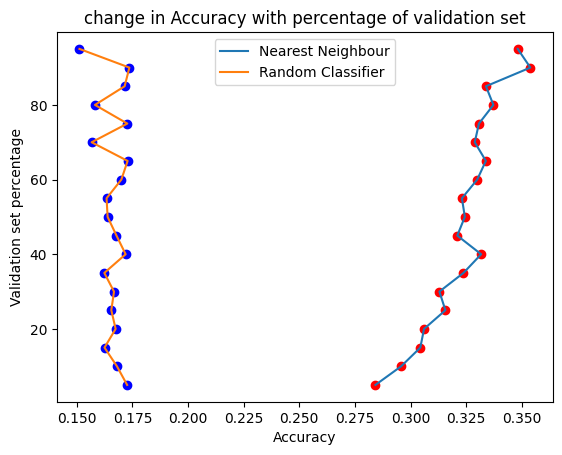

In [13]:
x1_vals = np.array([])
x2_vals = np.array([])
y_vals = np.array([])
for p in range(0, 100, 5):
  if p == 0 : continue
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, p/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  x1_vals = np.append(x1_vals, valAccuracy)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  x2_vals = np.append(x2_vals, valAccuracy)
  y_vals = np.append(y_vals, p)

plt.scatter(x1_vals, y_vals, c = 'red')
plt.plot(x1_vals, y_vals, label = "Nearest Neighbour")
plt.scatter(x2_vals, y_vals, c = 'blue')
plt.plot(x2_vals, y_vals, label = "Random Classifier")

plt.xlabel("Accuracy")
plt.ylabel("Validation set percentage")
plt.title("change in Accuracy with percentage of validation set")
plt.legend()
plt.show()

2. The size of the training and validation sets should strike a balance between having enough data to train a model effectively and having a sufficiently large validation set to reliably estimate the model's generalization performance. There is no one-size-fits-all answer, as the ideal sizes depend on the complexity of the problem, the amount of available data, and the specific goals of our project.


3. I suggest 20% validation set and 80% training set is balanced ratio

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [14]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [15]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33813510323122326
test accuracy is  0.34728354770589365


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


# ANSWERS
1. yes, averaging validation accuracy across multiple splits typically gives more consistent and reliable results compared to a single split. It helps reduce the impact of random variability that can occur when a single split is used. By repeeatedly splitting the data and calculating validation accuracy, we can obtain a more stable estimate of the model's performance on unseen data.
<div>
2. Averaging validation accuracy across multiple splits provides a more accurate estimate of the model's generalization performance on unseen data.
<div>
3. The number of iterations(splits) has a significant effect on the estimate of model performance. **Increasing the number of iterations generally leads to a more reliable estimate**. With higher iterations, the estimate becomes less sensitive to the specific random data splits and provides a more accurate representation of the model's generalization performance.
However, there is diminishing returns with increasing iterations. After a certain point, additional iterations may not significantly improve the estimate, and the computational cost may become a limiting factor.
<div>
4. Increasing the iterations can help mitigate the impact of a small dataset to some extent, as it allows you to explore different random splits and obtain more stable estimates.
However, it's essential to strike a balance between the number of iterations and the size of the dataset. If the dataset is exceptionally small, increasing the iterations may not be sufficient to compensate for the lack of training data.
In such cases, it's advisable to consider techniques like data augmentation, transfer learning, or obtaining additional data if possible to improve model performance.
